In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("creditcardfraud_normalised.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.564933,0.553154,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.565220,0.537005,0.664877,0.468492,0.592823,0.411176,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [5]:
from collections import Counter
#
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
  per = v/len(target)*100
  print("Class=%d, C,,nt=%d, Percentage=%.3f%%" % (k,v, per))

Class=0, C,,nt=284315, Percentage=99.827%
Class=1, C,,nt=492, Percentage=0.173%


In [6]:
# Remove class target from features data
Labels = df["class"].values
Features = df.drop(columns="class").values

# Dimensionality Reduction

In [6]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
Creditcard_pca = pca.fit_transform(Features)

In [7]:
# Transform PCA data to a DataFrame
df_creditcard_pca = pd.DataFrame(data=Creditcard_pca)
df_creditcard_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.009021,-0.030892,-0.076738,0.109754,-0.031201,0.061295,-0.032802,-0.001761,0.012430,0.023330,-0.012011,0.023238,0.010749
1,-0.045796,0.020565,0.037857,0.047513,0.011453,0.019738,0.095902,0.012650,-0.008587,-0.040195,0.028721,-0.021967,0.004722
2,-0.092871,-0.022728,0.055534,0.175360,0.176821,0.016072,0.037136,0.008332,-0.052305,-0.002622,-0.034794,0.025044,0.005698
3,-0.158406,-0.036253,0.039307,-0.047206,0.096097,-0.038692,-0.013468,-0.135202,-0.047761,-0.006864,0.000285,0.015696,0.009959
4,0.019035,0.082049,0.104177,0.013093,-0.062662,0.018176,-0.048931,0.002630,0.028257,-0.020202,-0.036453,0.020741,0.037826


In [8]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.13501017, 0.1257777 , 0.12031405, 0.09491123, 0.08192281,
       0.0798733 , 0.07468176, 0.06736614, 0.02903841, 0.02875001,
       0.02324262, 0.02255472, 0.02106087])

In [9]:
df_creditcard_pca.shape

(284807, 13)

### Note: PCA reduced number of features in the df from (284807, 29) to (284807, 13)

# TSNE

In [10]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df_creditcard_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 284807 samples in 0.730s...
[t-SNE] Computed neighbors for 284807 samples in 526.521s...
[t-SNE] Computed conditional probabilities for sample 1000 / 284807
[t-SNE] Computed conditional probabilities for sample 2000 / 284807
[t-SNE] Computed conditional probabilities for sample 3000 / 284807
[t-SNE] Computed conditional probabilities for sample 4000 / 284807
[t-SNE] Computed conditional probabilities for sample 5000 / 284807
[t-SNE] Computed conditional probabilities for sample 6000 / 284807
[t-SNE] Computed conditional probabilities for sample 7000 / 284807
[t-SNE] Computed conditional probabilities for sample 8000 / 284807
[t-SNE] Computed conditional probabilities for sample 9000 / 284807
[t-SNE] Computed conditional probabilities for sample 10000 / 284807
[t-SNE] Computed conditional probabilities for sample 11000 / 284807
[t-SNE] Computed conditional probabilities for sample 12000 / 284807
[t-SNE] Computed conditional proba

In [13]:
import seaborn as sns
df1 = pd.DataFrame()
y = Labels
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]

[Text(0.5, 1.0, 'CreditCard Dataset T-SNE projection')]

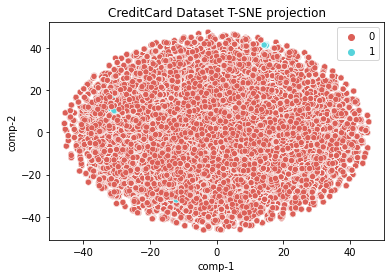

In [14]:
sns.scatterplot(x="comp-1", y="comp-2", hue=y,
                palette=sns.color_palette("hls", 2),
                data=df1).set(title="CreditCard Dataset T-SNE projection")

## Cluster Analysis with K-means

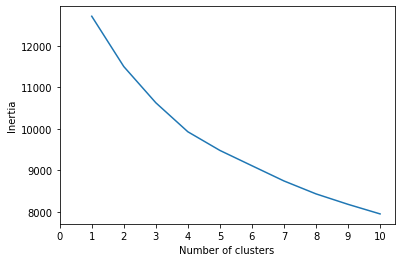

,k,inertia
0,1,12708.285936
1,2,11498.265497
2,3,10627.099800
3,4,9929.300311
4,5,9480.776401


In [15]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_creditcard_pca)
    u = km.inertia_
    inertia.append(u)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

## Using Inertia Value to find Optimal Hyperparameters

In [17]:
# Using Inertia Value for Finding Optimal Hyperparameters

init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=4, random_state=42, init=init)
    kmeans_model.fit(Features)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results

,Inertia Value
k-means++,11267.053593
random,11267.067777
